In [ ]:
!pip install datasets

  Using cached datasets-2.15.0-py3-none-any.whl (521 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Preprocess Dataset

## Finetune Datasets

In [ ]:
dataset = load_dataset("ai2_arc", 'ARC-Challenge')

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1119
    })
    test: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1172
    })
    validation: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 299
    })
})


In [ ]:
train_ds = dataset["train"]
valid_ds = dataset["validation"]
test_ds = dataset["test"]
print(train_ds)

Dataset({
    features: ['id', 'question', 'choices', 'answerKey'],
    num_rows: 1119
})


In [ ]:
def transform_arc_dataset(dataset, instruction_prompt):
    """
    Transforms the ARC dataset into the specified Pandas DataFrame format.

    Parameters:
    dataset (list): A list of dictionaries, each representing a question in the ARC dataset.

    Returns:
    pd.DataFrame: A DataFrame with two columns as specified.
    """
    transformed_data = []

    for entry in dataset:
        # Extracting question and choices
        question = entry['question']
        choices = entry['choices']['text']
        labels = entry['choices']['label']
        answer_key = entry['answerKey']

        # Formatting Column 1: Question and Choices
        formatted_question = instruction_prompt + question + "\n" + "\n".join([f"{label}. {choice}" for label, choice in zip(labels, choices)])

        # Formatting Column 2: Answer Key and Corresponding Choice
        answer_index = labels.index(answer_key)
        formatted_answer = f"{answer_key}. {choices[answer_index]}"

        # Appending the formatted data
        transformed_data.append([formatted_question, formatted_answer])

    # Creating a DataFrame
    df = pd.DataFrame(transformed_data, columns=['Question and Choices', 'Answer'])

    return df

In [ ]:
instruction = """Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.\n"""
train_df = transform_arc_dataset(train_ds, instruction)
valid_df = transform_arc_dataset(valid_ds, instruction)
test_df = transform_arc_dataset(test_ds, instruction)

In [ ]:
print(train_df.iloc[0,0])

Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.
George wants to warm his hands quickly by rubbing them. Which skin surface will produce the most heat?
A. dry palms
B. wet palms
C. palms covered with oil
D. palms covered with lotion


In [ ]:
print(train_df.head(2))
print(valid_df.head(2))
print(test_df.head(2))

                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                    Answer  
0                             A. dry palms  
1  B. The refrigerator door contains iron.  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                        Answer  
0  D. Record the details of the investigation.  
1                                   C. drought  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                   Answer  
0  C. Planetary days will become shorter.  
1         B. buildings will be made safer  


In [ ]:
train_df.to_csv('../data/train_df-arc_challenge.csv', index=False)
valid_df.to_csv('../data/valid_df-arc_arc_challenge.csv', index=False)
test_df.to_csv('../data/test_df-arc_arc_challenge.csv', index=False)

## Pretrain Data

In [ ]:
courpus_path = r"./ARC_Corpus.txt"

In [ ]:
def process_large_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = [line.strip("\n") for line in file.readlines()]
    pd.DataFrame(corpus).to_csv(r"./ARC_corpus.csv", header=False, index = False)


process_large_file(courpus_path)

In [ ]:
corpus_csv_path = r"./ARC_corpus.csv"
corpus_df = pd.read_csv(corpus_csv_path, header = None)

In [ ]:
pd.set_option('display.max_colwidth', None)
print(corpus_df.head(20))

                                                                                                                                                                                                                                                                                                                                                               0
0                                                                                                                                                                                                                                                          Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                                                     

In [ ]:
# Assuming your DataFrame is named df and the column is named 'column_name'
# text_to_check = "The force of gravity overcomes the"
text_to_check = "will use magnets to explore how gravity"
# exists = text_to_check in corpus_df.values.squeeze(1)
corpus_data = corpus_df.values.squeeze(1)
results = [entry for idx, entry in enumerate(corpus_data) if text_to_check in entry]
for idx, entry in enumerate(corpus_df.values.squeeze(1)):
    if text_to_check in entry:
        print(idx, entry)

28957 Then the super cool part- children will use magnets to explore how gravity can easily be overcome by other forces- almost like defying gravity!


In [ ]:
print(corpus_data[1000])

Thus, when we see such strata inclined instead of horizontal, evidence of an episode of deformation.


In [ ]:
print(corpus_df.values.squeeze(1)[:10])

['Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.\n'
 'Paleoceanography, 8(2): 193-208.\n'
 'Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.\n'
 'The same problems apply with wolf-domestic dog hybrids.\n'
 'taking stock of delightful days\n'
 'The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.\n'
 'ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).\n'
 'until they institute such safeguards and assurances of

In [ ]:
corpus_df.__len__

<bound method DataFrame.__len__ of                                                                                                                                                                                                                                                                                                           0
0                                                                                                                                                                                                     Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                          Paleoceanography, 8(2): 193-208.
2                                                                

In [ ]:
corpus_df.columns=['sentence']
corpus_df.head()

,sentence
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations."
1,"Paleoceanography, 8(2): 193-208."
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines."
3,The same problems apply with wolf-domestic dog hybrids.
4,taking stock of delightful days


In [ ]:
corpus_df.to_csv(r"./ARC_corpus.csv",index=False)

### check for length


In [ ]:
# Split sentences into words and count them
corpus_df['sentence_length'] = corpus_df['sentence'].str.split().str.len()


In [8]:
corpus_csv_path = r"./ARC_corpus.csv"
corpus_df= pd.read_csv(corpus_csv_path)
corpus_df.head()

,sentence,sentence_length
0,Large international companies are involved in ...,14
1,"Paleoceanography, 8(2): 193-208.",3
2,"Of course, for many in the media, “hydrogen su...",33
3,The same problems apply with wolf-domestic dog...,8
4,taking stock of delightful days,5


In [ ]:
corpus_df.head()

,sentence,sentence_length
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.",14
1,"Paleoceanography, 8(2): 193-208.",3
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.",33
3,The same problems apply with wolf-domestic dog hybrids.,8
4,taking stock of delightful days,5


<Axes: xlabel='sentence_length'>

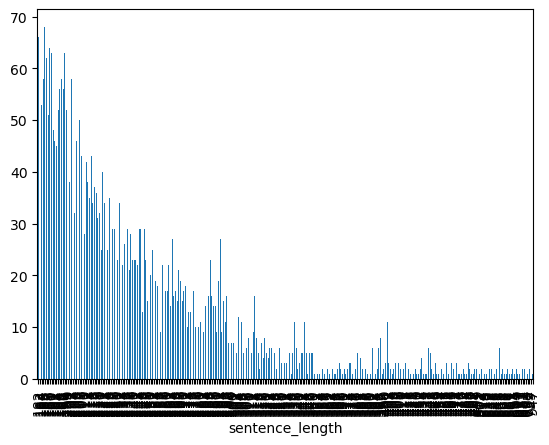

In [ ]:
corpus_df['sentence_length'].value_counts().sort_index()[-300:].plot(kind='bar')

In [ ]:
corpus_df[corpus_df.sentence_length>=182]

In [10]:
df_filtered = corpus_df[(corpus_df.sentence_length>=27) & (corpus_df.sentence_length<28)]
df_filtered

,sentence,sentence_length
23,He noticed that the feeding does not seem to t...,27
97,"He was born in 1924 at Villemomble , France an...",27
98,The task to which the gospel calls him is simp...,27
164,"A species that exhibited no variation at all, ...",27
250,"Specifically, bicarbonate concentration and CO...",27
...,...,...
14621447,It is a cliche that a woman is more responsive...,27
14621644,In the latter third and early fourth centuries...,27
14621709,"As you can see above, there are no distinct cl...",27
14621800,"This means that a top-level consumer, such as ...",27


In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
df_filtered = df_filtered[~df_filtered['sentence'].str.contains("\?")]
df_filtered

,sentence,sentence_length
23,"He noticed that the feeding does not seem to take place very often, and presumed that the high nutritive value of the material provided makes it unnecessary.",27
97,"He was born in 1924 at Villemomble , France and began ballet lessons at the age of nine at the Paris Opera 's School of Dance .",27
98,"The task to which the gospel calls him is simply to exercise faith, which he is both warranted and obliged to do by Gods command and promise.",27
164,"A species that exhibited no variation at all, and that showed no change over time, not even neutral molecular differences, would be a major puzzler for biology.",27
250,"Specifically, bicarbonate concentration and CO2 were 20 mm and ∼30 Torr too high, respectively, and pH was ∼0.4 pH units too acidic (Maren & Vogh, 1980 ).",27
...,...,...
14621447,"It is a cliche that a woman is more responsive to a man's forgetfulness than to his attentions, and men have noticed this as well as woman.",27
14621644,"In the latter third and early fourth centuries, another reading of the commandment came to great prominence in the Church with the rise of the monastic movement.",27
14621709,"As you can see above, there are no distinct clusters of data, as you would expect if there were significant species-based differences in skull and tooth morphologies.",27
14621800,"This means that a top-level consumer, such as a shark, is supported by millions of primary producers from the base of the food web or trophic pyramid.",27


In [ ]:
df_filtered.head(50)

,sentence,sentence_length
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.",14
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.",33
5,The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.,21
6,"ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).",47
8,"Sex brought the variations that could allow organisms to survive change” (2000, p. 163).",14
9,"Homo erectus had a long tenure; the earliest Homo erectus fossils are dated to roughly 1.8 million years ago, while the youngest fossils assigned to this species date to roughly 300 thousand years ago (ka).",35
11,free stresses the complete absence of external rule and the full right to make all of one's own decisions <you're free to do as you like>.,26
12,"We have brought together a group of experts from across Canada, the U.S., and Mexico to develop a practical reform agenda.",21
15,The kit is already stored in the cockpit and on the aft deck ready to be moved as quickly as possible.,21
18,English: Finless porpoise German ... be linked with reproductive cycles and ... occupy an important place in the daily life of people in ...,24


### kmeans

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Apply TF-IDF to your data
tfidf_matrix = vectorizer.fit_transform(df_filtered['sentence'])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
reduced_feature= pca.fit_transform(tfidf_matrix.toarray())

In [16]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 1000  # This is an example; adjust based on your dataset

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(reduced_feature)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
import numpy as np

# Select samples from each cluster
selected_indices = []
for i in range(n_clusters):
    cluster_indices = np.where(clusters == i)[0]
    selected_indices.extend(np.random.choice(cluster_indices, size=1))  # Change size based on how many you want from each cluster

# Create the final dataset
final_df = df_filtered.iloc[selected_indices].sample(n=1000, random_state=1)  # Randomly select 1,000 rows from the chosen samples

In [22]:
final_df.to_csv("./filleted1000.csv")

In [26]:
excluded = df_filtered[~df_filtered.index.isin(selected_indices)]

In [29]:
final_ex=pd.concat([final_df,excluded.sample(n = 500)],axis = 0)

In [30]:
final_ex

,sentence,sentence_length
10289426,Virtually all the information shown on Bluescreen's BSOD and system start screen is obtained from your system configuration - its accuracy will fool even advanced NT developers.,27
580788,BTVI plays an important role in that aspect and ensuring people are qualified and letting them know there are honest jobs out there which pay extremely well.,27
1852489,Histologic and immunohistochemical examination of these same tissues showed no indications of inflammatory or other pathologic changes except for occasional deposits of diseaseassociated prion protein in kidneys.,27
14506530,"All of the earthquake times in Wikipedia are cited in UTC, which I'm sure is scientifically rigorous and all that, but local time would be useful too.",27
11661841,"For that to happen according to the tenet’s of the LPA, the HoR needs to hold a vote and amend the Temporary Constitutional Declaration of August 2011.",27
...,...,...
7233379,"I’ve definitely felt a lot of resonance with everything mentioned in these posts, but I also have a nagging worry that I’m merely trying to label myself.",27
1602236,Category :1970 births Category : Living people Category : American movie actors Category : African American actors Category : Actors from Indiana Category : Comedians from Indiana,27
14606706,"I noticed half a dozen groups of slender damsels with short frocks and long tails, who may grow up to be the belles of the next generation.",27
2204829,"Eastern White pine (Pinus strobus L.) appears to be the preferred host within its range, but the sawyer will also readily attack jack pine (P. banksiana Lamb.)",27


In [31]:
final_ex.to_csv("./filleted1500.csv")